[*********************100%***********************]  1 of 1 completed

df shape = (64, 5)
columns = [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


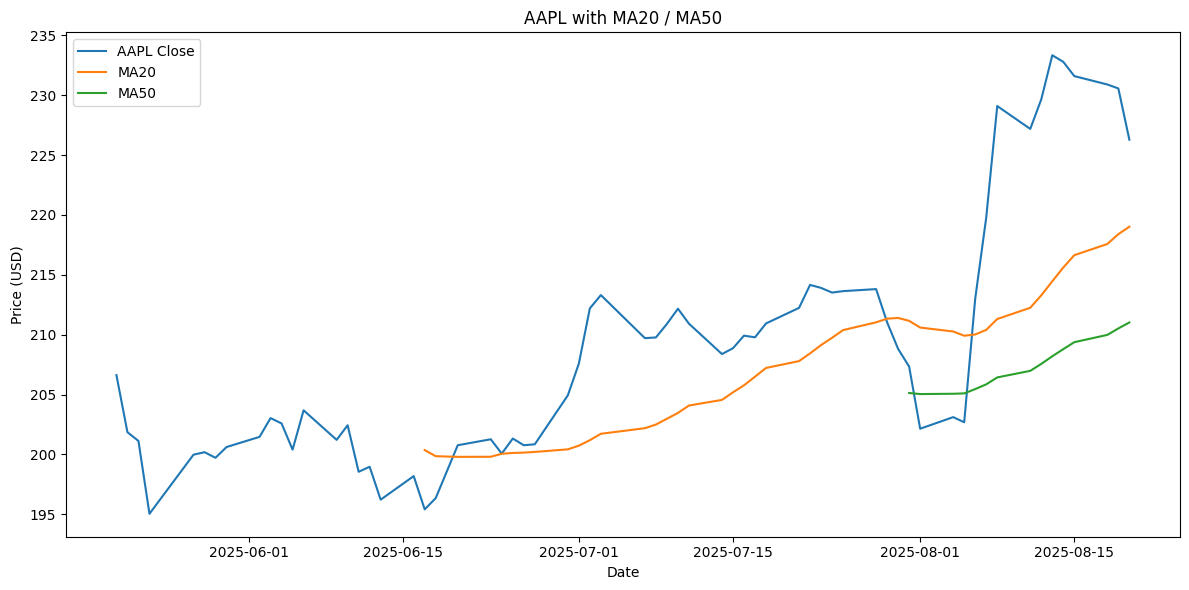

In [16]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 讓表格顯示更好看（可選）
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 20)

# 1) 下載資料
data = yf.download("AAPL", period="3mo", interval="1d")

# 2) 最基本檢查：資料是否有抓到
print("df shape =", data.shape)
print("columns =", list(data.columns)[:10])

# 3) 如果還沒建立移動平均，就先建立
if "MA20" not in data.columns:
    data["MA20"] = data["Close"].rolling(window=20).mean()
if "MA50" not in data.columns:
    data["MA50"] = data["Close"].rolling(window=50).mean()

# 4) 再檢查必要欄位（縮排要正確）
required_cols = ["Close", "MA20", "MA50"]
for c in required_cols:
    if c not in data.columns:
        raise ValueError(f"缺少欄位: {c}，請檢查前面計算/資料是否為空。")

# 5) 簡單畫圖
plt.figure(figsize=(12,6))
plt.plot(data.index, data["Close"], label="AAPL Close")
plt.plot(data.index, data["MA20"], label="MA20")
plt.plot(data.index, data["MA50"], label="MA50")
plt.title("AAPL with MA20 / MA50")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 最基本檢查：資料是否有抓到
print("df shape =", data.shape)
print("columns =", list(data.columns)[:10])

# 如果要用到移動平均，請先建立它
if "MA20" not in data.columns:
data["MA20"] = data["Close"].rolling(window=20).mean()
if "MA50" not in data.columns:
data["MA50"] = data["Close"].rolling(window=50).mean()

# 再確認欄位真的存在，否則直接報錯停止
required_cols = ["Close", "MA20", "MA50"]
missing = [c for c in required_cols if c not in data.columns]
if missing:
raise RuntimeError(f"缺少欄位：{missing}，請檢查前面計算/資料是否為空。")
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 讓表格顯示更好看（可選）
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 20)


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data.index, data["Close"], label="AAPL Close")
plt.title("Apple Stock Price - Last 3 Months")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# RSI (14)
delta = data["Close"].diff()
gain = delta.clip(lower=0).rolling(14).mean()
loss = (-delta.clip(upper=0)).rolling(14).mean()
rs = gain / loss
data["RSI"] = 100 - (100 / (1 + rs))

data.tail(10) # 檢查最後幾筆是否有 MA/RSI


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)

# 上圖：收盤 + 均線
ax1.plot(data.index, data["Close"], label="AAPL Close")
ax1.plot(data.index, data["MA20"], label="MA20", linestyle="--")
ax1.plot(data.index, data["MA50"], label="MA50", linestyle=":")
ax1.set_title("Apple Stock Price with Moving Averages")
ax1.set_ylabel("Price (USD)")
ax1.legend()

# 下圖：RSI
ax2.plot(data.index, data["RSI"], label="RSI")
ax2.axhline(70, color="red", linestyle="--", alpha=0.7) # 超買線
ax2.axhline(30, color="green", linestyle="--", alpha=0.7) # 超賣線
ax2.set_title("Relative Strength Index (RSI)")
ax2.set_xlabel("Date")
ax2.set_ylabel("RSI")
ax2.legend()

plt.tight_layout()
plt.show()
